In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm

In [2]:
df_s=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\STUDIYA.csv")
df_1=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\1k.csv")
df_2=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\2k.csv")
df_3=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\3k.csv")
df_4=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\4k.csv")
df_5=pd.read_csv(r"C:\Users\Stepan\Desktop\ВУЗ\Клиент-серверные\папка датафреймов\5k.csv")
df=pd.concat([df_s,df_1,df_2,df_3,df_4,df_5], ignore_index=True)
df_raw=df.drop('Unnamed: 0', axis=1)
df_raw=df_raw.rename(columns={'coords_len':'coord_len'})
df_raw

,metro_name,time_to_metro,num_rooms,total_area,year_house,kitchen_area,repair,price,floors,num_floor,address,date,coord_width,coord_len,link
0,Цветной бульвар,до 5 мин.,Cтудия,"36,7",NaN,NaN,дизайнерский,21000000.0,4.0,1.0,"Москва, Трубная ул., 29с2",2023-04-29,55.772102,37.624480,https://www.avito.ru/moskva/kvartiry/kvartira-...
1,Ясенево,6–10 мин.,Cтудия,26 м,NaN,NaN,евро,3174900.0,16.0,16.0,"Москва, ул. Паустовского, 8к3",2023-04-29,55.599967,37.536365,https://www.avito.ru/moskva/kvartiry/kvartira-...
2,Улица академика Янгеля,от 31 мин.,Cтудия,10 м,1973.0,NaN,требует ремонта,2500000.0,12.0,1.0,"Москва, Медынская ул., 4/1",2023-04-29,55.592490,37.645717,https://www.avito.ru/moskva/kvartiry/kvartira-...
3,Братиславская,21–30 мин.,Cтудия,"24,5",NaN,NaN,NaN,5700000.0,26.0,9.0,"ул. Люблинская, вл. 72, корп. 11",2023-04-29,55.665770,37.734130,https://www.avito.ru/moskva/kvartiry/kvartira-...
4,Панфиловская,6–10 мин.,Cтудия,"13,3",1960.0,NaN,дизайнерский,4900000.0,1.0,1.0,"Москва, ул. Маршала Конева, 2",2023-04-29,55.799952,37.491889,https://www.avito.ru/moskva/kvartiry/kvartira-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12099,Кропоткинская,6–10 мин.,5,230,NaN,25м²,евро,210000000.0,7.0,4.0,"Москва, 2-й Обыденский пер., 3с1",2023-04-06,55.741546,37.604421,https://www.avito.ru/moskva/kvartiry/5-k._kvar...
12100,Чкаловская,11–15 мин.,5,"342,",2023.0,35м²,требует ремонта,318034178.0,9.0,9.0,"Москва, Серебрянический пер., 8",2023-04-14,55.750019,37.647457,https://www.avito.ru/moskva/kvartiry/5-k._kvar...
12101,Минская,21–30 мин.,1,750,NaN,55м²,требует ремонта,193750000.0,19.0,17.0,"Москва, Минская ул., 1Гк6",2023-04-11,55.710849,37.498698,https://www.avito.ru/moskva/kvartiry/10_i_bole...
12102,Минская,21–30 мин.,6,583,NaN,58м²,евро,295000000.0,22.0,19.0,"Москва, Минская ул., 1Гк2",2023-04-06,55.712122,37.499067,https://www.avito.ru/moskva/kvartiry/6-k._kvar...


In [3]:
# Посмотрим общую информацию о датафрейме
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12104 entries, 0 to 12103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   metro_name     11993 non-null  object 
 1   time_to_metro  11993 non-null  object 
 2   num_rooms      12085 non-null  object 
 3   total_area     12085 non-null  object 
 4   year_house     7638 non-null   float64
 5   kitchen_area   10082 non-null  object 
 6   repair         11634 non-null  object 
 7   price          12085 non-null  float64
 8   floors         12076 non-null  float64
 9   num_floor      12076 non-null  float64
 10  address        12078 non-null  object 
 11  date           12082 non-null  object 
 12  coord_width    12078 non-null  float64
 13  coord_len      12078 non-null  float64
 14  link           12104 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.4+ MB


In [4]:
#списки числовых и категориальных признаков
num_col=['time_to_metro', 'total_area','year_house','kitchen_area','coord_width','coord_len','floors', 'num_floor']
cat_col=['metro_name','time_to_metro','num_rooms', 'date', 'repair']
cat_col

['metro_name', 'time_to_metro', 'num_rooms', 'date', 'repair']

In [5]:
#удалим дубликаты
n_duplicates = df.duplicated(
    subset=['address', 'num_floor', 'num_rooms', 'total_area'],keep='first').sum()
print(f'Количество дубликатов: {n_duplicates}')
df_raw = df_raw.drop_duplicates(
    subset=['address', 'num_floor', 'num_rooms', 'total_area'],
    keep='last')
old_ad=len(df[df['date']<'2023-01-01'])
print(f"Количество старых объявлений (до 2023 года): {old_ad}")

Количество дубликатов: 2260
Количество старых объявлений (до 2023 года): 0


In [6]:
#Исправим ошибки парсинга
df_raw.time_to_metro=df_raw.time_to_metro.transform(lambda x: np.mean([int(i) for i in re.findall('[0-9]+', str(x))]))
df_raw.total_area=df_raw.total_area.transform(lambda x: np.mean([int(i) for i in re.findall('[0-9]+', str(x))]))
df_raw.kitchen_area=df_raw.kitchen_area.transform(lambda x: np.mean([int(i) for i in re.findall('[0-9]+', str(x))]))
df_raw.date=df_raw.date.astype('str')

C:\Users\Stepan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Stepan\AppData\Local\Temp\ipykernel_20428\2191841983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw.time_to_metro=df_raw.time_to_metro.transform(lambda x: np.mean([int(i) for i in re.findall('[0-9]+', str(x))]))
C:\Users\Stepan\AppData\Local\Temp\ipykernel_20428\2191841983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [7]:
#удаляем nan значения в price
df_raw=df_raw.dropna(subset=['price'])


In [8]:
#Подготовим признак количeства комнат
df_raw.num_rooms=df_raw.num_rooms.transform(lambda x: '0' if str(x).strip()=='Cтудия' else x)
df_raw.num_rooms=df_raw.num_rooms.astype('float')

In [9]:
df_raw

,metro_name,time_to_metro,num_rooms,total_area,year_house,kitchen_area,repair,price,floors,num_floor,address,date,coord_width,coord_len,link
1,Ясенево,8.0,0.0,26.0,NaN,NaN,евро,3174900.0,16.0,16.0,"Москва, ул. Паустовского, 8к3",2023-04-29,55.599967,37.536365,https://www.avito.ru/moskva/kvartiry/kvartira-...
2,Улица академика Янгеля,31.0,0.0,10.0,1973.0,NaN,требует ремонта,2500000.0,12.0,1.0,"Москва, Медынская ул., 4/1",2023-04-29,55.592490,37.645717,https://www.avito.ru/moskva/kvartiry/kvartira-...
3,Братиславская,25.5,0.0,14.5,NaN,NaN,NaN,5700000.0,26.0,9.0,"ул. Люблинская, вл. 72, корп. 11",2023-04-29,55.665770,37.734130,https://www.avito.ru/moskva/kvartiry/kvartira-...
4,Панфиловская,8.0,0.0,8.0,1960.0,NaN,дизайнерский,4900000.0,1.0,1.0,"Москва, ул. Маршала Конева, 2",2023-04-29,55.799952,37.491889,https://www.avito.ru/moskva/kvartiry/kvartira-...
6,Рассказовка,31.0,0.0,20.0,2012.0,NaN,косметический,3290000.0,3.0,2.0,"Москва, Новомосковский административный округ,...",2023-04-29,55.647214,37.327623,https://www.avito.ru/moskva/kvartiry/kvartira-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12099,Кропоткинская,8.0,5.0,230.0,NaN,25.0,евро,210000000.0,7.0,4.0,"Москва, 2-й Обыденский пер., 3с1",2023-04-06,55.741546,37.604421,https://www.avito.ru/moskva/kvartiry/5-k._kvar...
12100,Чкаловская,13.0,5.0,342.0,2023.0,35.0,требует ремонта,318034178.0,9.0,9.0,"Москва, Серебрянический пер., 8",2023-04-14,55.750019,37.647457,https://www.avito.ru/moskva/kvartiry/5-k._kvar...
12101,Минская,25.5,1.0,750.0,NaN,55.0,требует ремонта,193750000.0,19.0,17.0,"Москва, Минская ул., 1Гк6",2023-04-11,55.710849,37.498698,https://www.avito.ru/moskva/kvartiry/10_i_bole...
12102,Минская,25.5,6.0,583.0,NaN,58.0,евро,295000000.0,22.0,19.0,"Москва, Минская ул., 1Гк2",2023-04-06,55.712122,37.499067,https://www.avito.ru/moskva/kvartiry/6-k._kvar...


boxplot for 0 rooms
count    1222.000000
mean       14.313421
std        11.454105
min         5.500000
25%        10.000000
50%        12.000000
75%        17.000000
max       343.000000
Name: total_area, dtype: float64


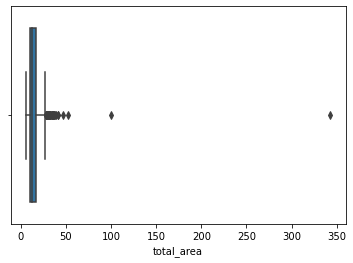

boxplot for 1 rooms
count    1523.000000
mean       33.669074
std        65.042517
min         7.500000
25%        20.000000
50%        23.500000
75%        36.000000
max      1050.000000
Name: total_area, dtype: float64


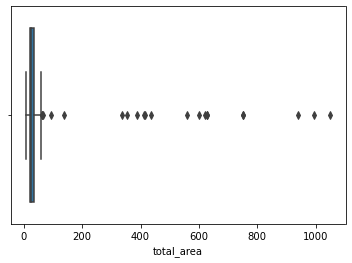

boxplot for 2 rooms
count    1787.000000
mean       41.188025
std        17.828265
min        11.500000
25%        28.000000
50%        37.000000
75%        52.000000
max       196.000000
Name: total_area, dtype: float64


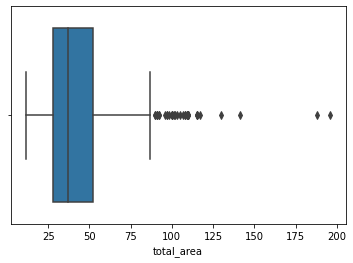

boxplot for 3 rooms
count    1466.000000
mean       65.272851
std        33.974382
min        11.500000
25%        39.000000
50%        59.000000
75%        81.000000
max       270.000000
Name: total_area, dtype: float64


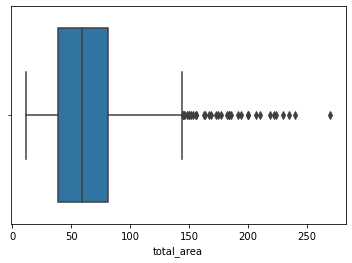

boxplot for 4 rooms
count    2649.000000
mean      135.165723
std        55.633302
min        28.500000
25%       101.000000
50%       132.000000
75%       168.000000
max       402.000000
Name: total_area, dtype: float64


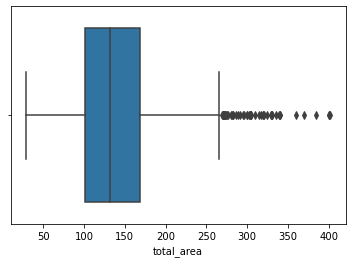

boxplot for 6 rooms
count     318.000000
mean      304.525157
std       144.469390
min        52.000000
25%       210.000000
50%       272.000000
75%       352.250000
max      1040.000000
Name: total_area, dtype: float64


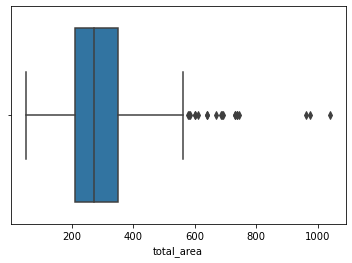

boxplot for 5 rooms
count    878.000000
mean     211.441344
std       89.488342
min       38.000000
25%      151.000000
50%      200.000000
75%      247.000000
max      885.000000
Name: total_area, dtype: float64


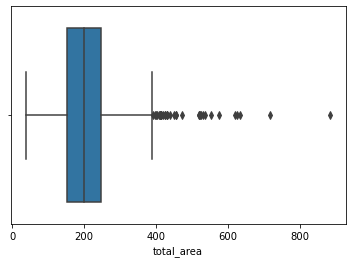

{0.0: 31.0, 1.0: 68.0, 2.0: 100.0, 3.0: 165.0, 4.0: 302.0, 6.0: 636.75, 5.0: 439.0}


In [10]:
#словарь максимальных площадей квартир для каждого количества комнат 
#максимальное значение будем брать, как 2 межквартильных расстояния, отложенное от верхнего квартиля, а не как обычно 1.5.
dict_max_ta={}
for i in df_raw.num_rooms.unique():
    
    print(f'boxplot for {int(i)} rooms')
    sns.boxplot(x=df_raw[df_raw['num_rooms']==i]['total_area'])
    desc_tab=df_raw[df_raw['num_rooms']==i]['total_area'].describe()
    print(desc_tab)
    dict_max_ta[i]=desc_tab['75%']+2*(desc_tab['75%']-desc_tab['25%'])
    plt.show()
print(dict_max_ta)

In [11]:
#создадим список индексов, которые нужно удалить
drop_index=[]
for i in df_raw.num_rooms.unique():
    time_index=df_raw[(df_raw['num_rooms']==i) & (df_raw['total_area']>dict_max_ta[i])].index.tolist()
    drop_index.extend(time_index)
df_raw=df_raw.drop(index=drop_index, axis=0)
print(f'Количество удаленных выбросов total_area: {len(drop_index)}')

Количество удаленных выбросов total_area: 145


boxplot for 0 rooms
count    1197.000000
mean       13.545113
std         5.207730
min         5.500000
25%        10.000000
50%        12.000000
75%        16.000000
max        31.000000
Name: total_area, dtype: float64


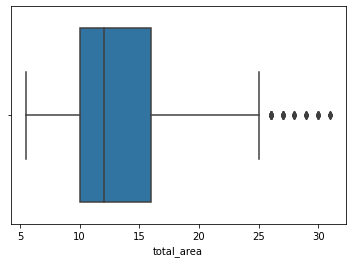

boxplot for 1 rooms
count    1505.000000
mean       27.366777
std         9.655900
min         7.500000
25%        20.000000
50%        23.500000
75%        35.000000
max        65.000000
Name: total_area, dtype: float64


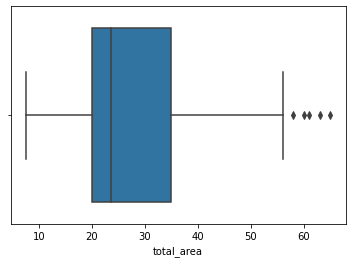

boxplot for 2 rooms
count    1766.000000
mean       40.257078
std        15.501390
min        11.500000
25%        28.000000
50%        36.500000
75%        52.000000
max       100.000000
Name: total_area, dtype: float64


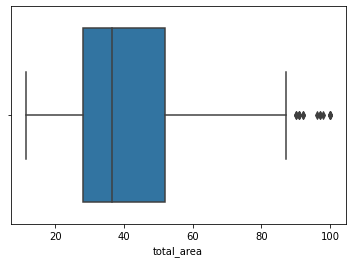

boxplot for 3 rooms
count    1442.000000
mean       63.013870
std        29.168606
min        11.500000
25%        39.000000
50%        58.000000
75%        80.000000
max       164.000000
Name: total_area, dtype: float64


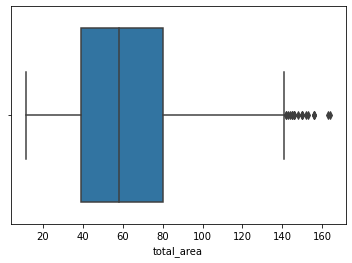

boxplot for 4 rooms
count    2624.000000
mean      133.240473
std        52.180576
min        28.500000
25%       101.000000
50%       131.000000
75%       166.000000
max       302.000000
Name: total_area, dtype: float64


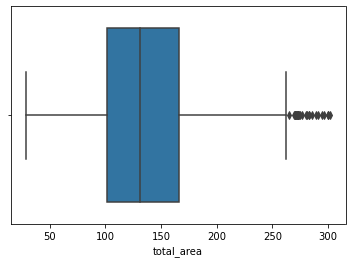

boxplot for 6 rooms
count    304.000000
mean     283.434211
std      104.758195
min       52.000000
25%      206.750000
50%      262.000000
75%      344.750000
max      610.000000
Name: total_area, dtype: float64


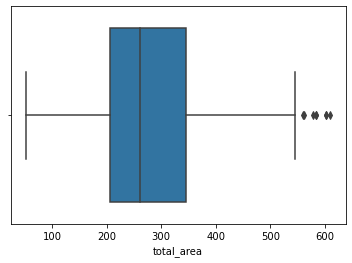

boxplot for 5 rooms
count    860.000000
mean     204.197093
std       73.293610
min       38.000000
25%      150.000000
50%      198.000000
75%      240.500000
max      431.000000
Name: total_area, dtype: float64


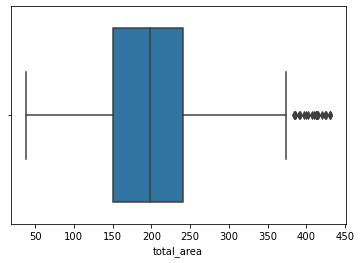

In [12]:
#посмотрим распределение площадей для каждого колиечства комнат после удаления выбросов.
for i in df_raw.num_rooms.unique():
    
    print(f'boxplot for {int(i)} rooms')
    sns.boxplot(x=df_raw[df_raw['num_rooms']==i]['total_area'])
    desc_tab=df_raw[df_raw['num_rooms']==i]['total_area'].describe()
    print(desc_tab)

    plt.show()

boxplot for 0 rooms
count    1.197000e+03
mean     5.356390e+06
std      2.870160e+06
min      2.300000e+06
25%      3.600000e+06
50%      4.350000e+06
75%      5.650000e+06
max      2.350000e+07
Name: price, dtype: float64


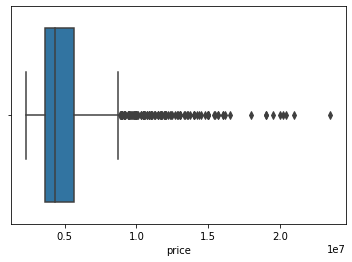

boxplot for 1 rooms
count    1.505000e+03
mean     1.115420e+07
std      5.508535e+06
min      1.191000e+06
25%      8.500000e+06
50%      1.000000e+07
75%      1.250000e+07
max      1.400000e+08
Name: price, dtype: float64


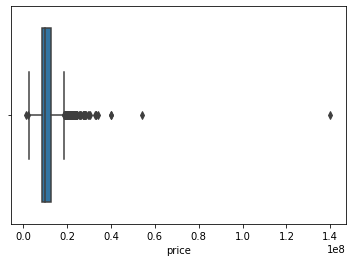

boxplot for 2 rooms
count    1.766000e+03
mean     1.739899e+07
std      1.180760e+07
min      2.900000e+06
25%      1.150000e+07
50%      1.400000e+07
75%      1.870000e+07
max      1.632548e+08
Name: price, dtype: float64


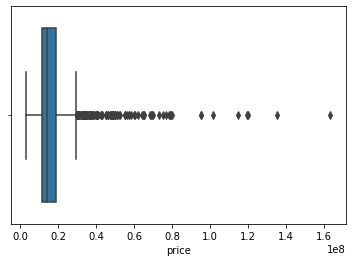

boxplot for 3 rooms
count    1.442000e+03
mean     2.807560e+07
std      2.312407e+07
min      2.806000e+06
25%      1.499000e+07
50%      2.000000e+07
75%      3.099750e+07
max      2.500000e+08
Name: price, dtype: float64


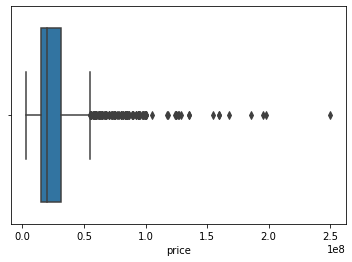

boxplot for 4 rooms
count    2.624000e+03
mean     8.656712e+07
std      8.207420e+07
min      9.000000e+06
25%      3.443083e+07
50%      5.900000e+07
75%      1.100000e+08
max      7.097500e+08
Name: price, dtype: float64


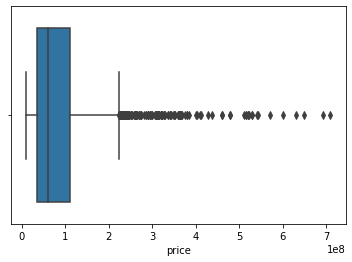

boxplot for 6 rooms
count    3.040000e+02
mean     2.313621e+08
std      1.977607e+08
min      2.298000e+07
25%      9.500000e+07
50%      1.630601e+08
75%      3.252363e+08
max      1.180000e+09
Name: price, dtype: float64


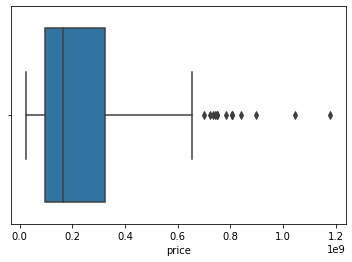

boxplot for 5 rooms
count    8.600000e+02
mean     1.589993e+08
std      1.516877e+08
min      1.300000e+07
25%      6.950000e+07
50%      1.100000e+08
75%      2.000000e+08
max      1.574701e+09
Name: price, dtype: float64


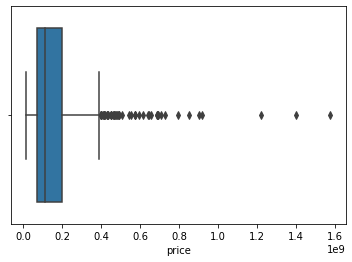

In [13]:
#посмотрим распределение цены для каждого количества комнат 
for i in df_raw.num_rooms.unique():
    
    print(f'boxplot for {int(i)} rooms')
    sns.boxplot(x=df_raw[df_raw['num_rooms']==i]['price'])
    desc_tab=df_raw[df_raw['num_rooms']==i]['price'].describe()
    print(desc_tab)

    plt.show()

In [14]:
#удалим записи со слишком высокими ценами
drop_price=[]
drop_price.extend(df_raw[(df_raw['num_rooms']==1) & (df_raw['price']>35000000)].index.tolist())
drop_price.extend(df_raw[(df_raw['num_rooms']==2) & (df_raw['price']>80000000)].index.tolist())
drop_price.extend(df_raw[(df_raw['num_rooms']==3) & (df_raw['price']>150000000)].index.tolist())
drop_price.extend(df_raw[(df_raw['num_rooms']==4) & (df_raw['price']>400000000)].index.tolist())
drop_price.extend(df_raw[(df_raw['num_rooms']==5) & (df_raw['price']>600000000)].index.tolist())
df_raw=df_raw.drop(index=drop_price, axis=0)
print(f'Количество удаленных выбросов price: {len(drop_price)}')

Количество удаленных выбросов price: 63


boxplot for 0 rooms
count    1.197000e+03
mean     5.356390e+06
std      2.870160e+06
min      2.300000e+06
25%      3.600000e+06
50%      4.350000e+06
75%      5.650000e+06
max      2.350000e+07
Name: price, dtype: float64


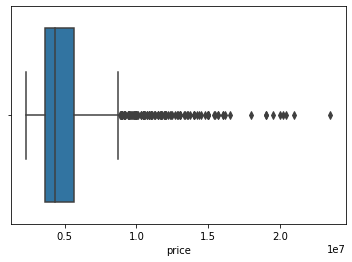

boxplot for 1 rooms
count    1.501000e+03
mean     1.100138e+07
std      4.123199e+06
min      1.191000e+06
25%      8.500000e+06
50%      1.000000e+07
75%      1.246000e+07
max      3.400000e+07
Name: price, dtype: float64


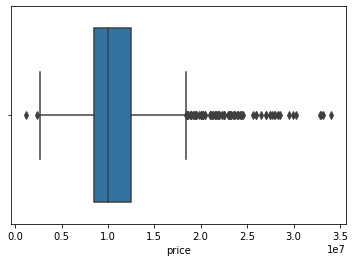

boxplot for 2 rooms
count    1.758000e+03
mean     1.694124e+07
std      9.574795e+06
min      2.900000e+06
25%      1.150000e+07
50%      1.400000e+07
75%      1.850000e+07
max      7.970000e+07
Name: price, dtype: float64


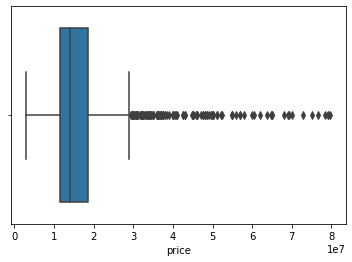

boxplot for 3 rooms
count    1.434000e+03
mean     2.720612e+07
std      1.991255e+07
min      2.806000e+06
25%      1.496000e+07
50%      2.000000e+07
75%      3.050000e+07
max      1.350000e+08
Name: price, dtype: float64


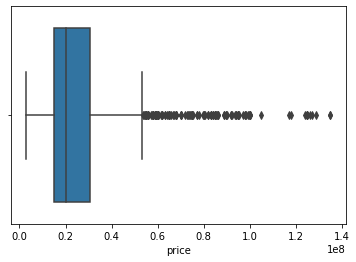

boxplot for 4 rooms
count    2.598000e+03
mean     8.224604e+07
std      6.962729e+07
min      9.000000e+06
25%      3.400000e+07
50%      5.894500e+07
75%      1.068403e+08
max      3.850000e+08
Name: price, dtype: float64


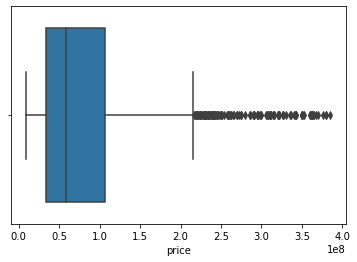

boxplot for 6 rooms
count    3.040000e+02
mean     2.313621e+08
std      1.977607e+08
min      2.298000e+07
25%      9.500000e+07
50%      1.630601e+08
75%      3.252363e+08
max      1.180000e+09
Name: price, dtype: float64


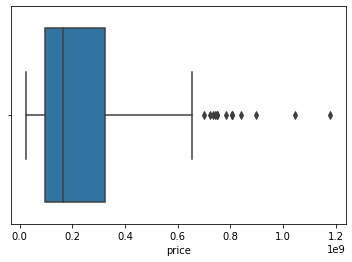

boxplot for 5 rooms
count    8.430000e+02
mean     1.451390e+08
std      1.104792e+08
min      1.300000e+07
25%      6.900000e+07
50%      1.100000e+08
75%      1.906750e+08
max      5.950000e+08
Name: price, dtype: float64


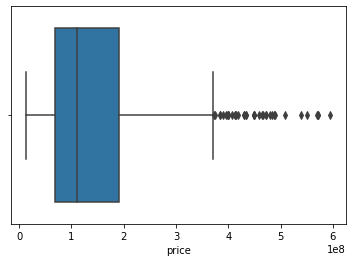

In [15]:
#посмотрим распределение цены для каждого количества комнат после удаления выбросов
for i in df_raw.num_rooms.unique():
    
    print(f'boxplot for {int(i)} rooms')
    sns.boxplot(x=df_raw[df_raw['num_rooms']==i]['price'])
    desc_tab=df_raw[df_raw['num_rooms']==i]['price'].describe()
    print(desc_tab)

    plt.show()

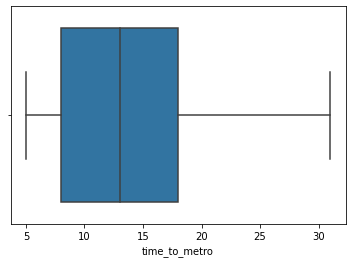

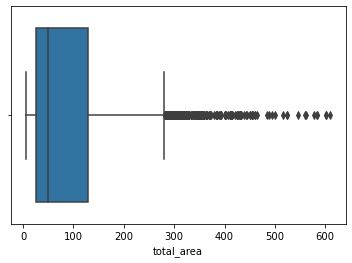

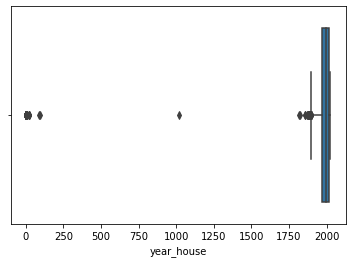

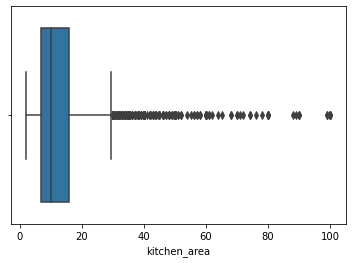

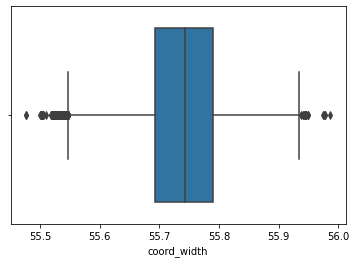

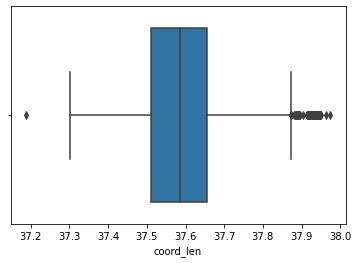

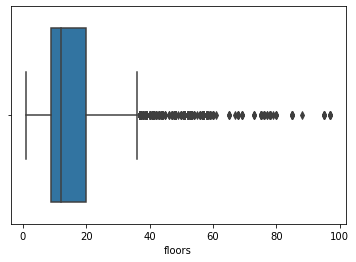

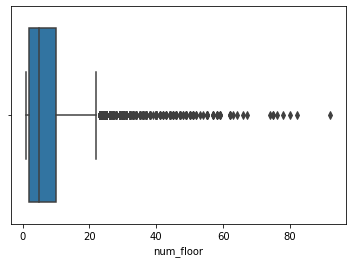

In [16]:

#Построим диаграммы размахов для каждого числового признака
for i in num_col:
    sns.boxplot(x=i, data=df_raw)
    plt.show()

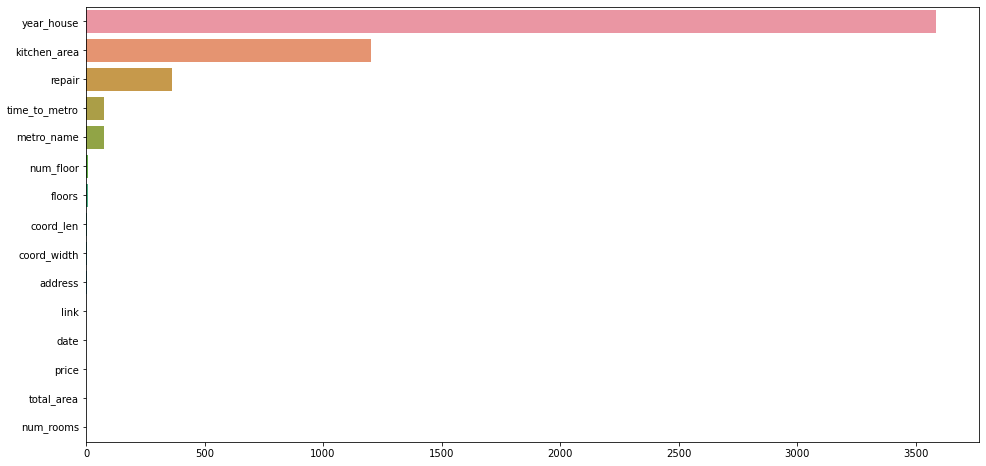

In [17]:
#nan значения
plt.figure(figsize=(16, 8))
a=df_raw.isna().sum().sort_values()[::-1]

sns.barplot(x=a.values, y=a.index)

plt.show()

               time_to_metro  num_rooms  total_area  year_house  kitchen_area  \
time_to_metro       1.000000  -0.147197   -0.156461    0.027688     -0.101564   
num_rooms          -0.147197   1.000000    0.798759   -0.016927      0.463650   
total_area         -0.156461   0.798759    1.000000    0.012533      0.566047   
year_house          0.027688  -0.016927    0.012533    1.000000      0.030170   
kitchen_area       -0.101564   0.463650    0.566047    0.030170      1.000000   
price              -0.179384   0.583463    0.804190    0.018748      0.425159   
floors              0.046399   0.117264    0.104257    0.048935      0.170675   
num_floor           0.018891   0.198574    0.185147    0.036319      0.179154   
coord_width        -0.087097   0.062569    0.052653   -0.007726      0.022819   
coord_len          -0.083932  -0.169859   -0.163852    0.006893     -0.136648   

                  price    floors  num_floor  coord_width  coord_len  
time_to_metro -0.179384  0.046399   0

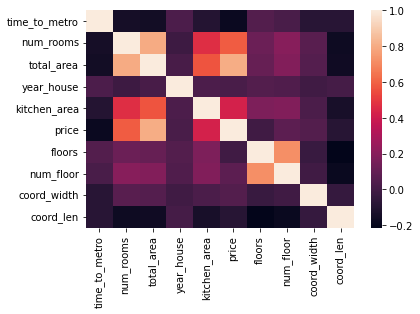

In [18]:
#Построим таблицу корреляции для числовых признаков
print(df_raw.corr())
print(sns.heatmap(df_raw.corr()))
#Проверим признак 'year_house' на отсутсвие зависимости с таргетом
df_time=df_raw.dropna()
y=df_time['price']
x=df_time['year_house']
x=sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

In [19]:
#Замена nan и слишком низких значений в годе постройки
df_raw.loc[df_raw['year_house']<1500, 'year_house']=1750
df_raw['year_house'].fillna(1750, inplace=True)

In [20]:
#Проверка nan значений площади кухни
df_raw[df_raw['num_rooms']==0].isna().sum()

metro_name         19
time_to_metro      19
num_rooms           0
total_area          0
year_house          0
kitchen_area     1196
repair              9
price               0
floors              2
num_floor           2
address             1
date                0
coord_width         1
coord_len           1
link                0
dtype: int64

In [21]:
#Замена nan значений площади кухни
ratio=np.mean(df_raw[df_raw['num_rooms']==1]['kitchen_area']/df_raw[df_raw['num_rooms']==1]['total_area'])
a=df_raw['kitchen_area'].isna()
ind_kitchen=list(filter(lambda x: a[x], a.index))
df_raw.loc[ind_kitchen, 'kitchen_area']=ratio*df_raw.loc[ind_kitchen, 'total_area']


In [22]:
#Заполним nan значения в ремонте
print(df_raw['repair'].value_counts())
df_raw['repair']=df_raw['repair'].fillna('косметический')


косметический      2567
требует ремонта    2427
евро               2332
дизайнерский       1947
Name: repair, dtype: int64


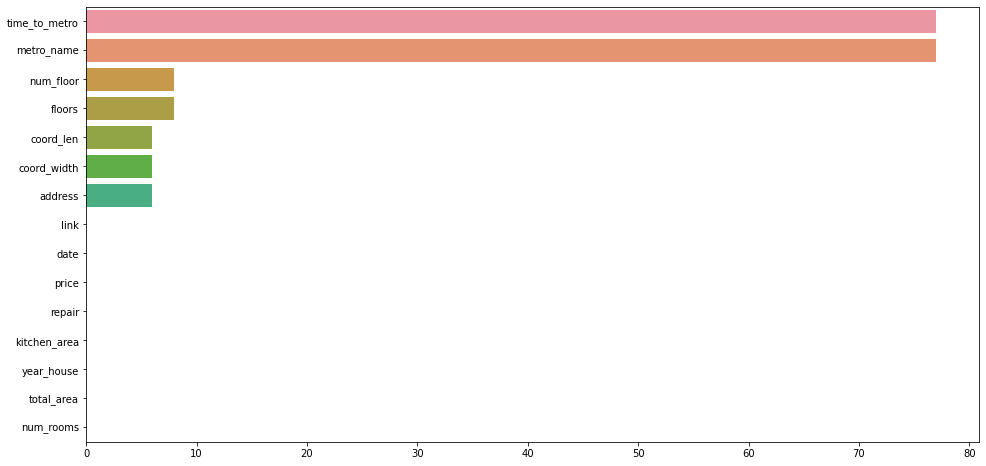

In [23]:
#nan значения
plt.figure(figsize=(16, 8))
a=df_raw.isna().sum().sort_values()[::-1]

sns.barplot(x=a.values, y=a.index)

plt.show()

In [24]:
df_raw=df_raw.dropna()

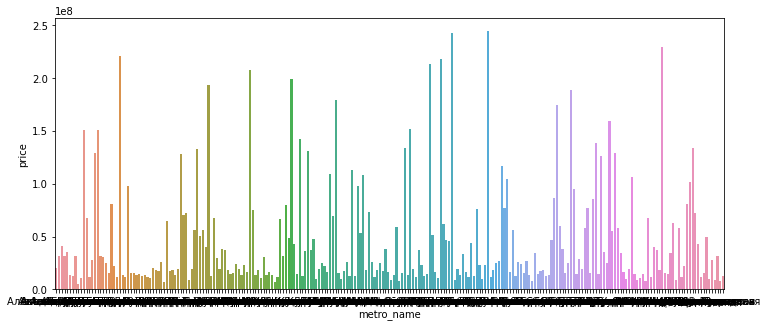

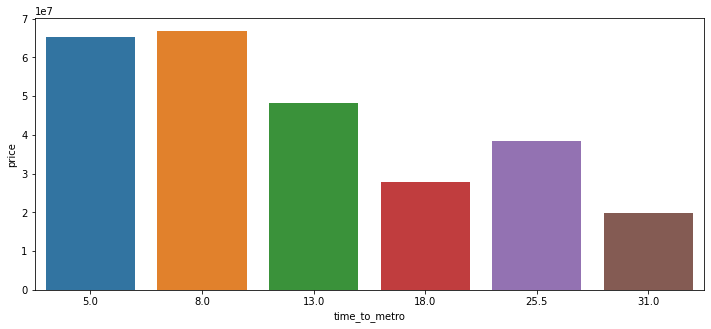

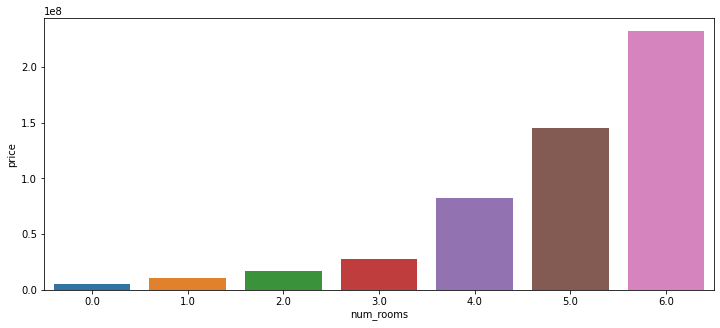

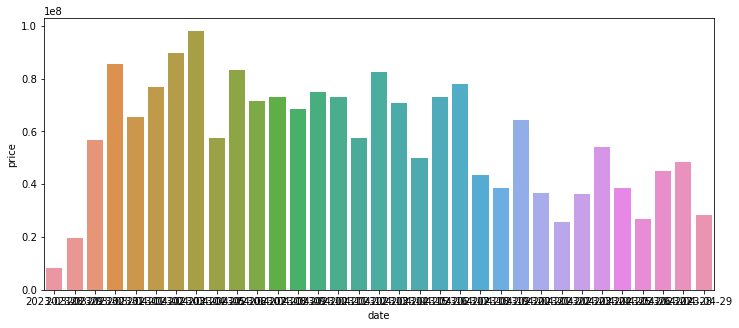

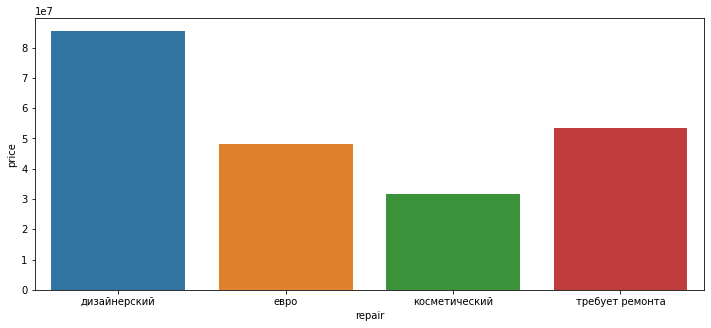

In [25]:
#Построим графики заивисмости категориальных признаков от цены
for i in cat_col:
    plt.figure(figsize=(12, 5))
    sns.barplot(x=df_raw.groupby(i).mean().index, y=df_raw.groupby(i).mean()['price'])
    plt.show()

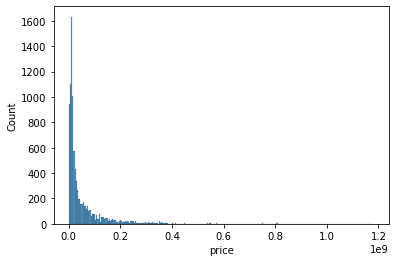

In [26]:
#Посмотрим распределение цены
sns.histplot(x='price', data=df_raw)
plt.show()

<AxesSubplot:ylabel='Count'>

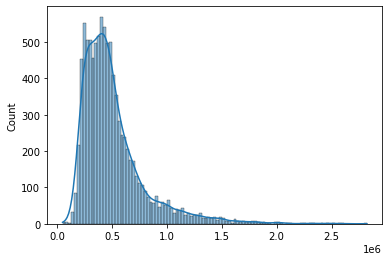

In [27]:
#Посмотрим распределение цены за квадратный метр
sns.histplot(x=df_raw['price']/df_raw['total_area'], kde=True)

<AxesSubplot:ylabel='Count'>

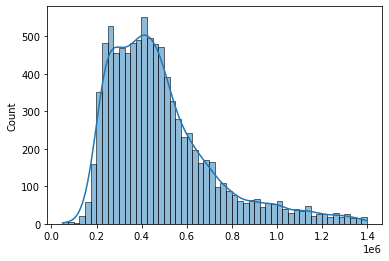

In [28]:
#Удалим слишком высокие цены за квадратный метр
a=df_raw['price']/df_raw['total_area']>1400000
drop_sqm=list(filter(lambda x: a[x], a.index))
df_raw=df_raw.drop(drop_sqm)
sns.histplot(x=df_raw['price']/df_raw['total_area'], kde=True)